In [1]:
dados_f1 = 'https://raw.githubusercontent.com/Mirlaa/s-ries-temporais-statsmodels/main/Dados/Temperatura_mensal_F1.csv'
dados_f2 = 'https://raw.githubusercontent.com/Mirlaa/s-ries-temporais-statsmodels/main/Dados/Temperatura_mensal_F2.csv'
dados_f3 = 'https://raw.githubusercontent.com/Mirlaa/s-ries-temporais-statsmodels/main/Dados/Temperatura_mensal_F3.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Passo 1: Carregar e Visualizar os Dados**

Carrega os dados de um arquivo CSV para um DataFrame e exibe as primeiras linhas para uma verificação rápida dos dados carregados.

# **Passo 2: Preparar os Dados**

Converte a coluna 'DATA' para o tipo datetime e define essa coluna como índice do DataFrame, o que facilita análises baseadas em série temporal. Em seguida, plota a série para visualização inicial.

# **Passo 3: Testar Estacionariedade**

Utiliza uma função estac previamente definida para realizar testes de estacionariedade na série temporal e imprimir os resultados.

# **Passo 4: Divisão dos Dados**

Divide a série temporal em conjuntos de treino (80%) e teste, definindo uma frequência mensal para ambos.

# **Passo 5: Análise de Autocorrelação**

Gera gráficos de autocorrelação e autocorrelação parcial para o conjunto de treino, usando 11 lags, para identificar padrões relevantes.

# **Passo 6: Modelo Autorregressivo Inicial**

Ajusta e exibe o resumo de um modelo autorregressivo simples utilizando 10 lags.

# **Passo 7: Diagnóstico do Modelo Autorregressivo**

Exibe diagnósticos gráficos do modelo autorregressivo para avaliar a adequação do ajuste.

# **Passo 8: Modelo ARMA**

Ajusta um modelo ARMA com ordem (10, 0, 1), imprime o resumo do modelo e mostra diagnósticos gráficos.

# **Passo 9: Busca em Grade para Parâmetros ARMA**

Define uma função para buscar os melhores parâmetros para o modelo ARMA utilizando busca em grade e executa essa busca.

# **Passo 10: Modelo ARMA Otimizado**

Ajusta e exibe o resumo de um modelo ARMA com os parâmetros ótimos encontrados, seguido de plotagem das previsões do modelo ARMA otimizado contra o conjunto de teste e avalia o desempenho usando métricas de erro.

# **Passo 11: Avaliação de Previsões**

Plota diagnósticos gráficos para verificar a adequação do modelo.



A análise dos resíduos pode ser ainda mais refinada com o auxílio de testes estatísticos, como o teste [Ljung-Box](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html). Este teste é usado para verificar a autocorrelação total em um conjunto de resíduos de um modelo ajustado. A principal função do teste Ljung-Box é determinar se os resíduos de um modelo autorregressivo são independentes, ou seja, se não possuem autocorrelações significativas em diversos lags.

O teste pode ser aplicado da seguinte forma:

In [3]:
# from statsmodels.stats.diagnostic import acorr_ljungbox

# lb_test = acorr_ljungbox(modelo.resid, return_df=True)
# print(lb_test)


# Fazenda 1

![Alt text: Imagem de uma fazenda com plantações de uvas](https://github.com/Mirlaa/s-ries-temporais-statsmodels/blob/main/imagens/Fazenda%201.png?raw=true)

In [4]:
df_f1 = pd.read_csv(dados_f1)
df_f1

,DATA,TEMP
0,1963-05-01,23.11
1,1963-06-01,24.20
2,1963-07-01,25.37
3,1963-08-01,23.86
4,1963-09-01,23.03
...,...,...
727,2023-12-01,19.49
728,2024-01-01,19.28
729,2024-02-01,19.73
730,2024-03-01,20.44


In [5]:
df_f1['DATA'] = pd.to_datetime(df_f1['DATA'], format = '%Y-%m-%d')
df_f1.set_index(['DATA'], inplace = True, drop = True)
df_f1

,TEMP
DATA,
1963-05-01,23.11
1963-06-01,24.20
1963-07-01,25.37
1963-08-01,23.86
1963-09-01,23.03
...,...
2023-12-01,19.49
2024-01-01,19.28
2024-02-01,19.73


<Axes: xlabel='DATA'>

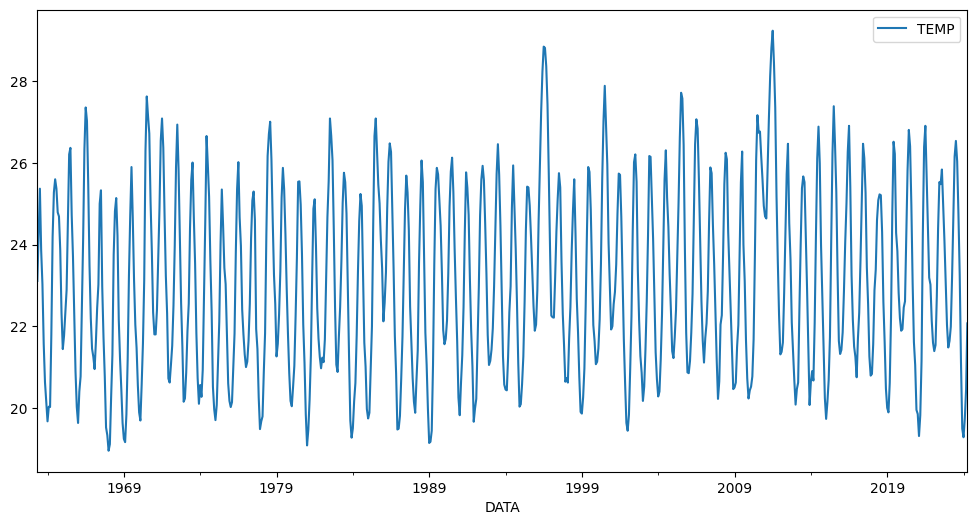

In [6]:
df_f1.plot(figsize=(12,6))

## Modelo ingênuo

Um modelo ingênuo (naive) em séries temporais é um dos métodos de previsão mais simples, baseando-se na suposição de que o melhor preditor para qualquer ponto futuro é o valor mais recente disponível na série. Isso significa que a previsão para todos os pontos futuros será igual ao último valor observado.

In [7]:
df_f1.shift(1)

,TEMP
DATA,
1963-05-01,NaN
1963-06-01,23.11
1963-07-01,24.20
1963-08-01,25.37
1963-09-01,23.86
...,...
2023-12-01,21.11
2024-01-01,19.49
2024-02-01,19.28


## Avaliando a estacionariedade

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

In [9]:
def estac(df):
  adf = adfuller(df)
  print(f'Valor-p do Teste ADF: {adf[1]:.4f}')
  if adf[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série não é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série é estacionária\n')

  kpss_saida = kpss(df)

  print(f'Valor-p do Teste KPSS: {kpss_saida[1]:.4f}')
  if kpss_saida[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série não é estacionária\n')


In [10]:
estac(df_f1)

Valor-p do Teste ADF: 0.0000
Rejeitar a Hipótese Nula: a série é estacionária

Valor-p do Teste KPSS: 0.0798
Não rejeitar a Hipótese Nula: a série é estacionária



In [11]:
divisao = int(len(df_f1) * 0.7)

treino = df_f1.iloc[:divisao].asfreq("MS")
teste = df_f1.iloc[divisao:].asfreq("MS")

## Modelo Autoregressivo (AR)

Um modelo Autorregressivo (AR) é um tipo de modelo de previsão para séries temporais que utiliza uma combinação linear de valores passados da própria série para fazer previsões futuras. Ele se baseia na ideia de que observações passadas podem ser usadas para prever observações futuras de maneira estatisticamente significativa, especialmente quando a série exibe correlação ao longo do tempo.

A equação básica de um modelo autorregressivo de ordem $(p)$ (lag de $p$ períodos) é dada por:

$X_t = c + \beta_1 X_{t-1} + \beta_2 X_{t-2} + \dots + \beta_p X_{t-p} + \epsilon_t$

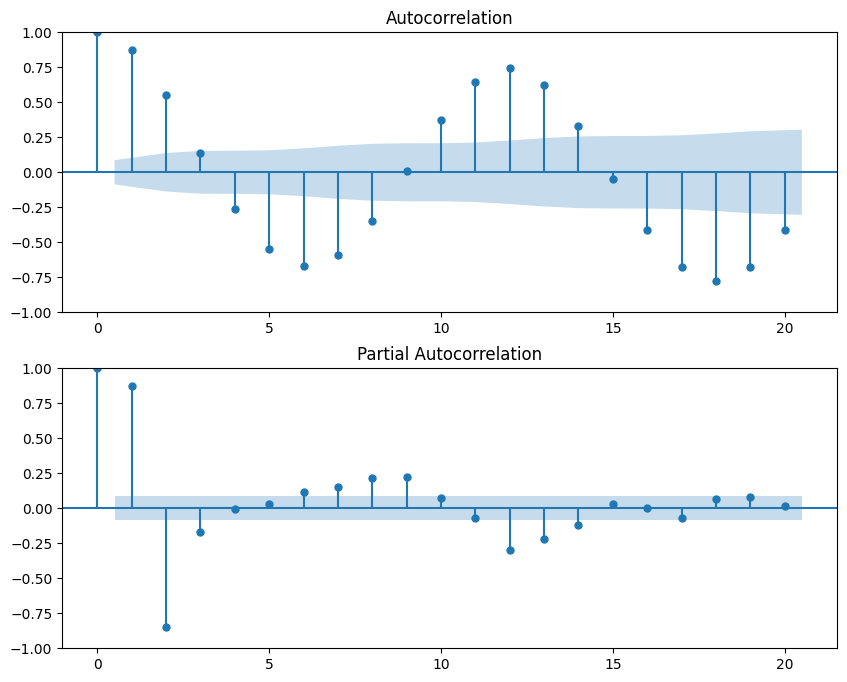

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig  = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(treino, lags = 20, ax = ax1)


ax2 = fig.add_subplot(212)
fig = plot_pacf(treino, lags=20, ax=ax2)

In [13]:
from statsmodels.tsa.ar_model import AutoReg

ar_mod = AutoReg(treino, 14, old_names = False)
ar_res = ar_mod.fit()
print(ar_res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   TEMP   No. Observations:                  512
Model:                    AutoReg(14)   Log Likelihood                -317.490
Method:               Conditional MLE   S.D. of innovations              0.458
Date:                Mon, 20 Jan 2025   AIC                            666.981
Time:                        12:13:45   BIC                            734.350
Sample:                    07-01-1964   HQIC                           693.421
                         - 12-01-2005                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0973      0.649      7.855      0.000       3.825       6.369
TEMP.L1        1.1971      0.044     27.078      0.000       1.110       1.284
TEMP.L2       -0.3092      0.069     -4.470      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/ar_model.py:1138: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ar_params[lag] = -params[i]


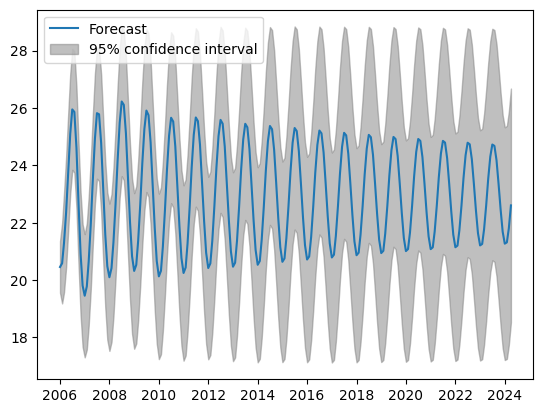

In [14]:
from statsmodels.tsa.ar_model import AutoRegResults

mod_result = AutoRegResults(ar_mod, ar_res.params, ar_res.cov_params())

fig = mod_result.plot_predict(len(treino), len(treino)+len(teste)-1)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_prev(treino, teste, mod, nome_mod = ''):

  previsoes = mod.predict(len(treino), len(treino) + len(teste)-1, dynamic=False)

  plt.figure(figsize=(12, 5))

  plt.plot(teste.index, teste, label='Esperado')
  plt.plot(previsoes.index, previsoes, label='Previsto', color='red')

  plt.title(f'Previsão modelo {nome_mod}')
  plt.ylabel('Temperatura')
  plt.legend()
  plt.show()

  print('\nMétricas:\n')
  mae = mean_absolute_error(teste, previsoes)
  print(f'MAE: {mae}')

  mse = mean_squared_error(teste, previsoes)
  print(f'MSE: {mse}')

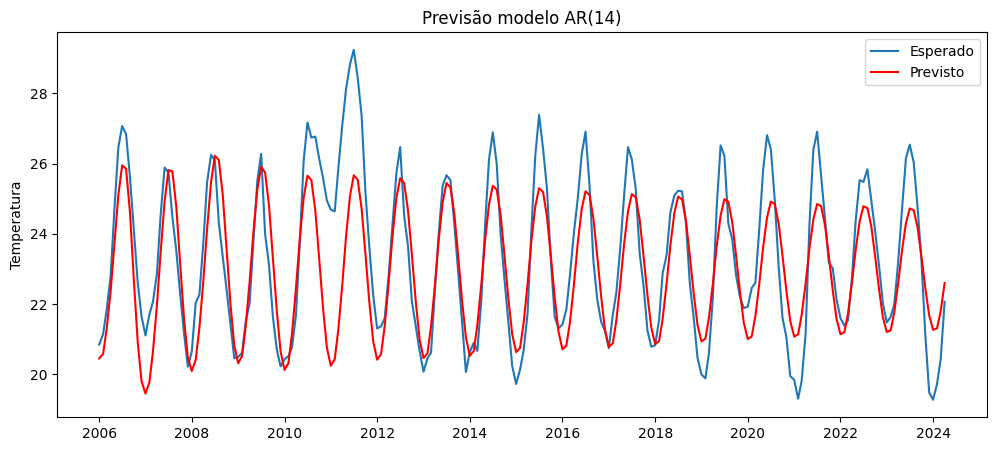


Métricas:

MAE: 1.042706398397448
MSE: 1.8489038142175698


In [16]:
plot_prev(treino, teste, ar_res, 'AR(14)')

### Busca de parâmetros

In [17]:
from statsmodels.tsa.ar_model import ar_select_order

ar_selecao = ar_select_order(treino, 35, old_names = False, ic = 'aic')


In [18]:
ar_selecao.ar_lags

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [19]:
ar_sel_res = ar_selecao.model.fit()
print(ar_sel_res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   TEMP   No. Observations:                  512
Model:                    AutoReg(34)   Log Likelihood                -265.842
Method:               Conditional MLE   S.D. of innovations              0.422
Date:                Mon, 20 Jan 2025   AIC                            603.684
Time:                        12:13:47   BIC                            753.790
Sample:                    03-01-1966   HQIC                           662.698
                         - 12-01-2005                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4648      1.091      4.092      0.000       2.326       6.603
TEMP.L1        1.1355      0.045     25.067      0.000       1.047       1.224
TEMP.L2       -0.2017      0.068     -2.958      0.0

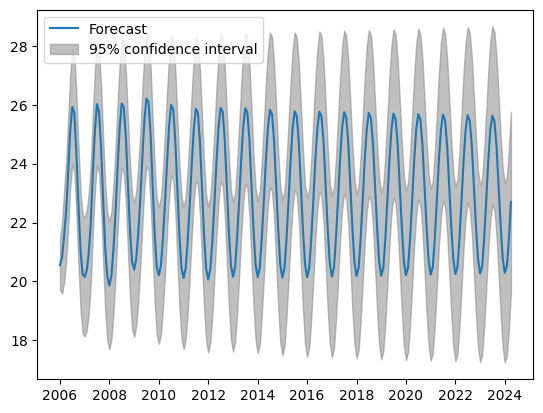

In [20]:
fig = ar_sel_res.plot_predict(len(treino), len(treino) + len(teste)-1)

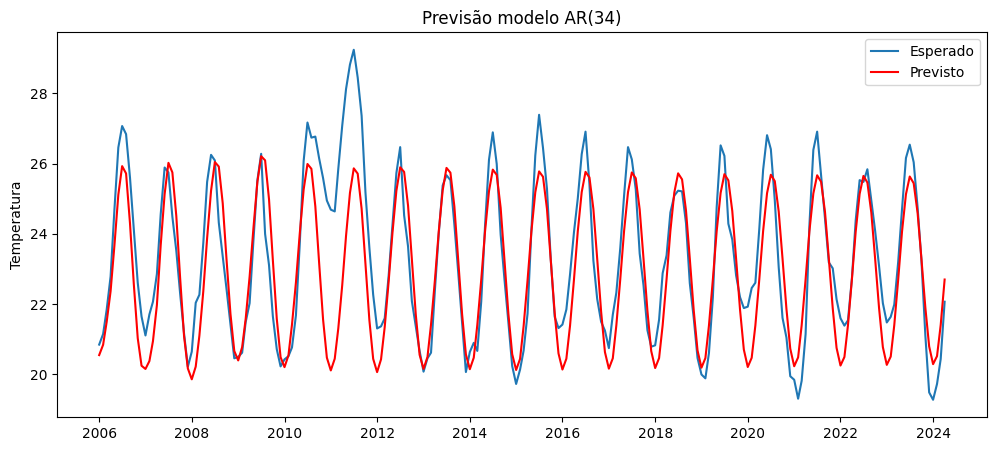


Métricas:

MAE: 0.9474776896251889
MSE: 1.661067311337596


In [21]:
plot_prev(treino, teste, ar_sel_res, 'AR(34)')

# Fazenda 2

![Alt text: Imagem de uma fazenda com plantações de tomates](https://github.com/Mirlaa/s-ries-temporais-statsmodels/blob/main/imagens/Fazenda%202.png?raw=true)

In [22]:
df_f2 = pd.read_csv(dados_f2)
df_f2

,DATA,TEMP
0,1966-02-01,23.436171
1,1966-03-01,29.787675
2,1966-04-01,25.626345
3,1966-05-01,22.958315
4,1966-06-01,19.513770
...,...,...
694,2023-12-01,15.033869
695,2024-01-01,17.323596
696,2024-02-01,22.818941
697,2024-03-01,29.429283


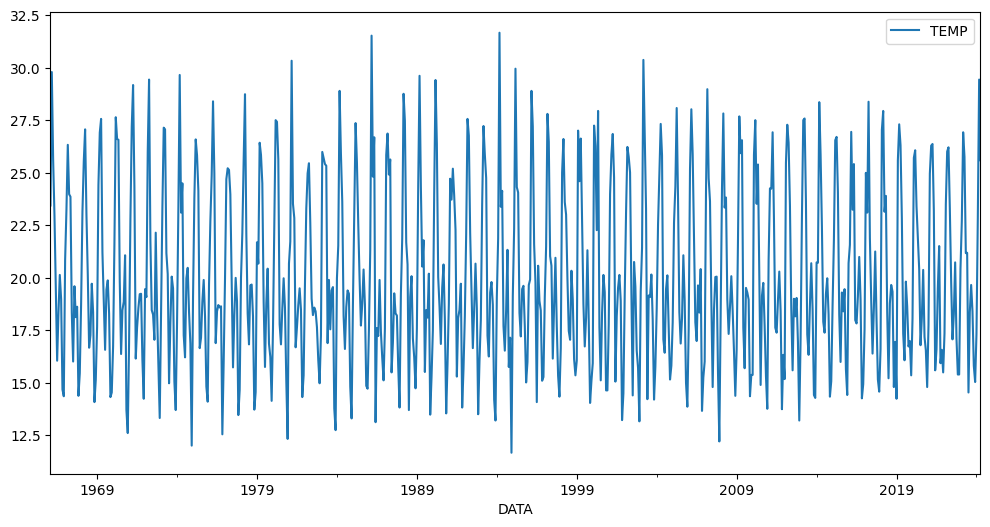

In [23]:
df_f2['DATA'] = pd.to_datetime(df_f2['DATA'], format='%Y-%m-%d')
df_f2.set_index(['DATA'], inplace=True, drop=True)
fig = df_f2.plot(figsize=(12, 6))

In [24]:
estac(df_f2)

Valor-p do Teste ADF: 0.0000
Rejeitar a Hipótese Nula: a série é estacionária

Valor-p do Teste KPSS: 0.1000
Não rejeitar a Hipótese Nula: a série é estacionária



<ipython-input-9-13a8a93cee06>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_saida = kpss(df)


In [25]:
divisao = int(len(df_f2)*0.8)

treino = df_f2.iloc[:divisao].asfreq('MS')
teste = df_f2.iloc[divisao:].asfreq('MS')

## Construindo um modelo previsivo

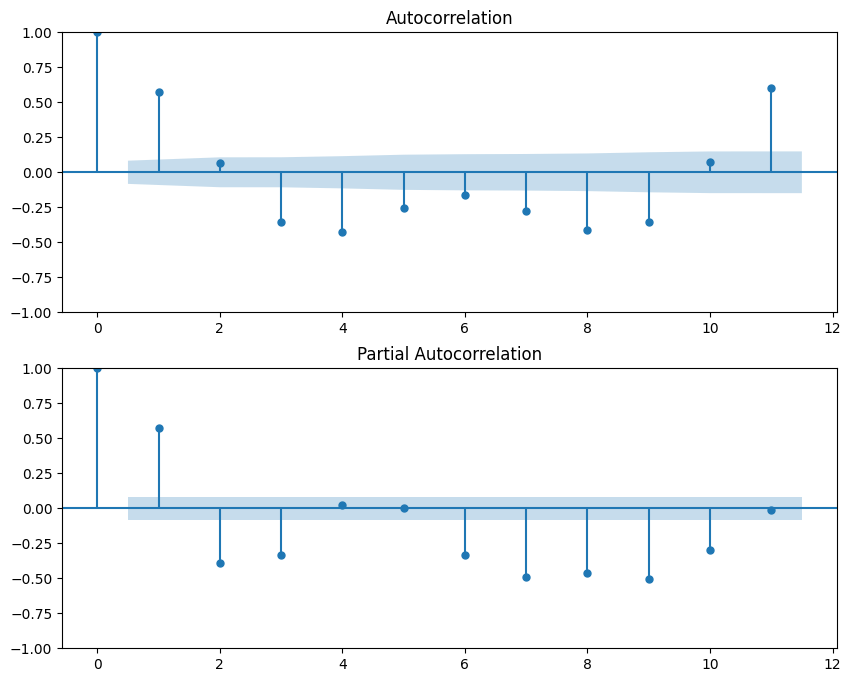

In [26]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(treino, lags=11, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(treino, lags=11, ax=ax2)

In [27]:
ar_mod_f2 = AutoReg(treino, 10, old_names = False).fit()
print(ar_mod_f2.summary())

                            AutoReg Model Results                             
Dep. Variable:                   TEMP   No. Observations:                  559
Model:                    AutoReg(10)   Log Likelihood                -993.284
Method:               Conditional MLE   S.D. of innovations              1.477
Date:                Mon, 20 Jan 2025   AIC                           2010.569
Time:                        12:13:50   BIC                           2062.266
Sample:                    12-01-1966   HQIC                          2030.773
                         - 08-01-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.9748      3.244     34.518      0.000     105.617     118.333
TEMP.L1       -0.3349      0.037     -9.170      0.000      -0.406      -0.263
TEMP.L2       -0.3242      0.030    -10.926      0.0

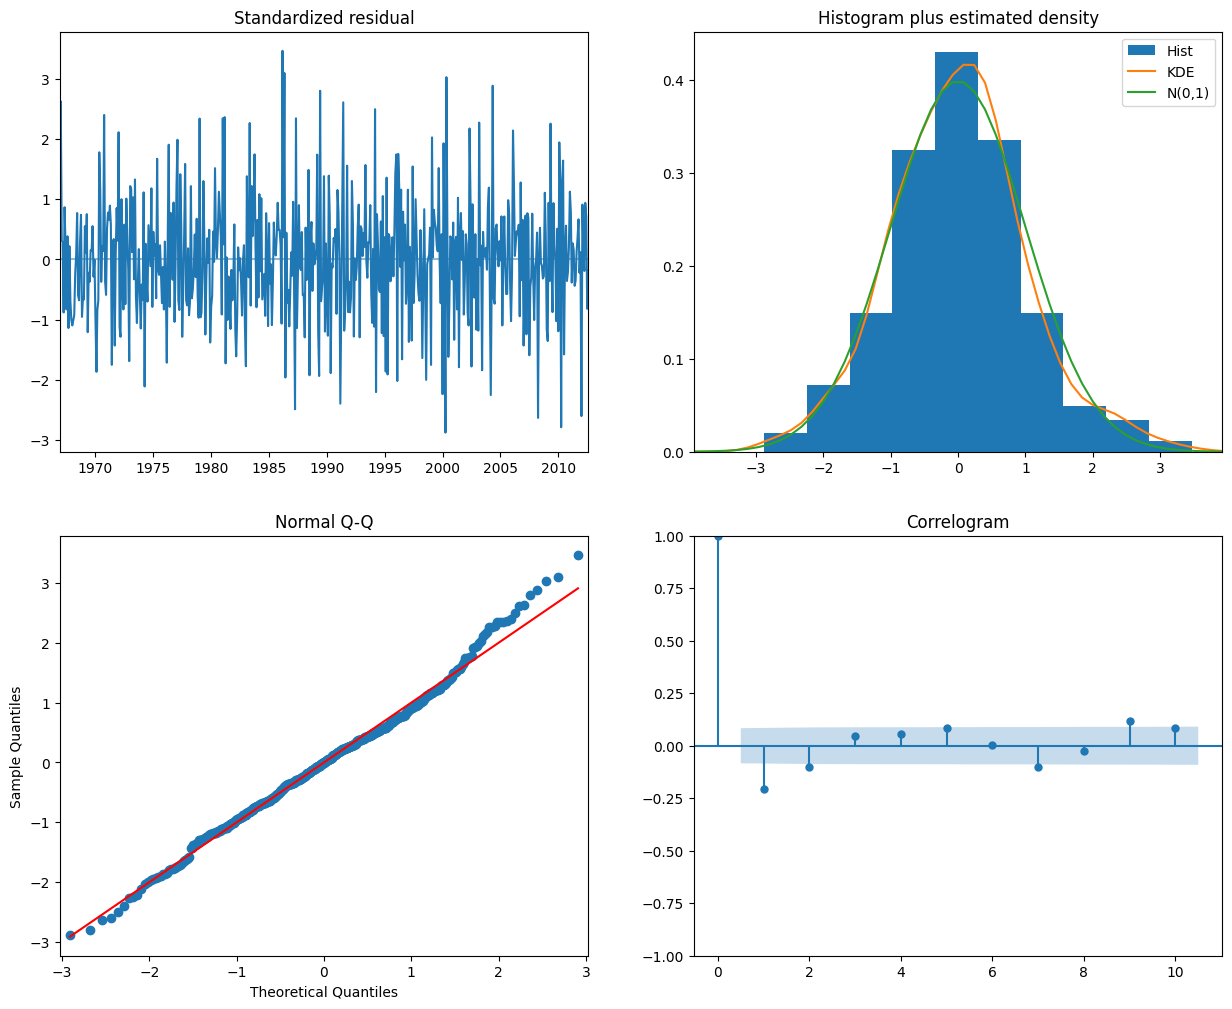

In [28]:
ar_mod_f2.plot_diagnostics(figsize = (15,12))
plt.show()

### Modelo Autorregressivo de Médias Móveis (ARMA)

O modelo ARMA é uma ferramenta estatística avançada usada na análise de séries temporais que combina duas características principais: autoregressiva (AR) e média móvel (MA).

O modelo ARMA é expresso pela seguinte equação:

$X_t = c + \epsilon_t + \sum_{i=1}^p \beta_i X_{t-i} + \sum_{j=1}^q \theta_j \epsilon_{t-j}$

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# valor de P : 10
# componentes: 0
# componente Q da média móvel: 1
arma_mod = ARIMA(treino, order = (10,0,1)).fit()


# O parâmetro order é configurado como uma tupla (p, d, q),
# onde 'p' é o número de termos autorregressivos,
# 'd' é a ordem de diferenciação, e 'q' é o número de termos de média móvel.
# O modelo ARIMA requer que os parâmetros de ordem sejam fornecidos como uma tupla (p, d, q),
#  onde p é o número de lags (termos autorregressivos), d é a ordem de diferenciação e q é o número de termos da média móvel.





print(arma_mod.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   TEMP   No. Observations:                  559
Model:                ARIMA(10, 0, 1)   Log Likelihood                -988.510
Date:                Mon, 20 Jan 2025   AIC                           2003.020
Time:                        12:13:55   BIC                           2059.260
Sample:                    02-01-1966   HQIC                          2024.982
                         - 08-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9727      0.008   2365.385      0.000      19.956      19.989
ar.L1         -0.0891      0.058     -1.543      0.123      -0.202       0.024
ar.L2         -0.3211      0.034     -9.505      0.0

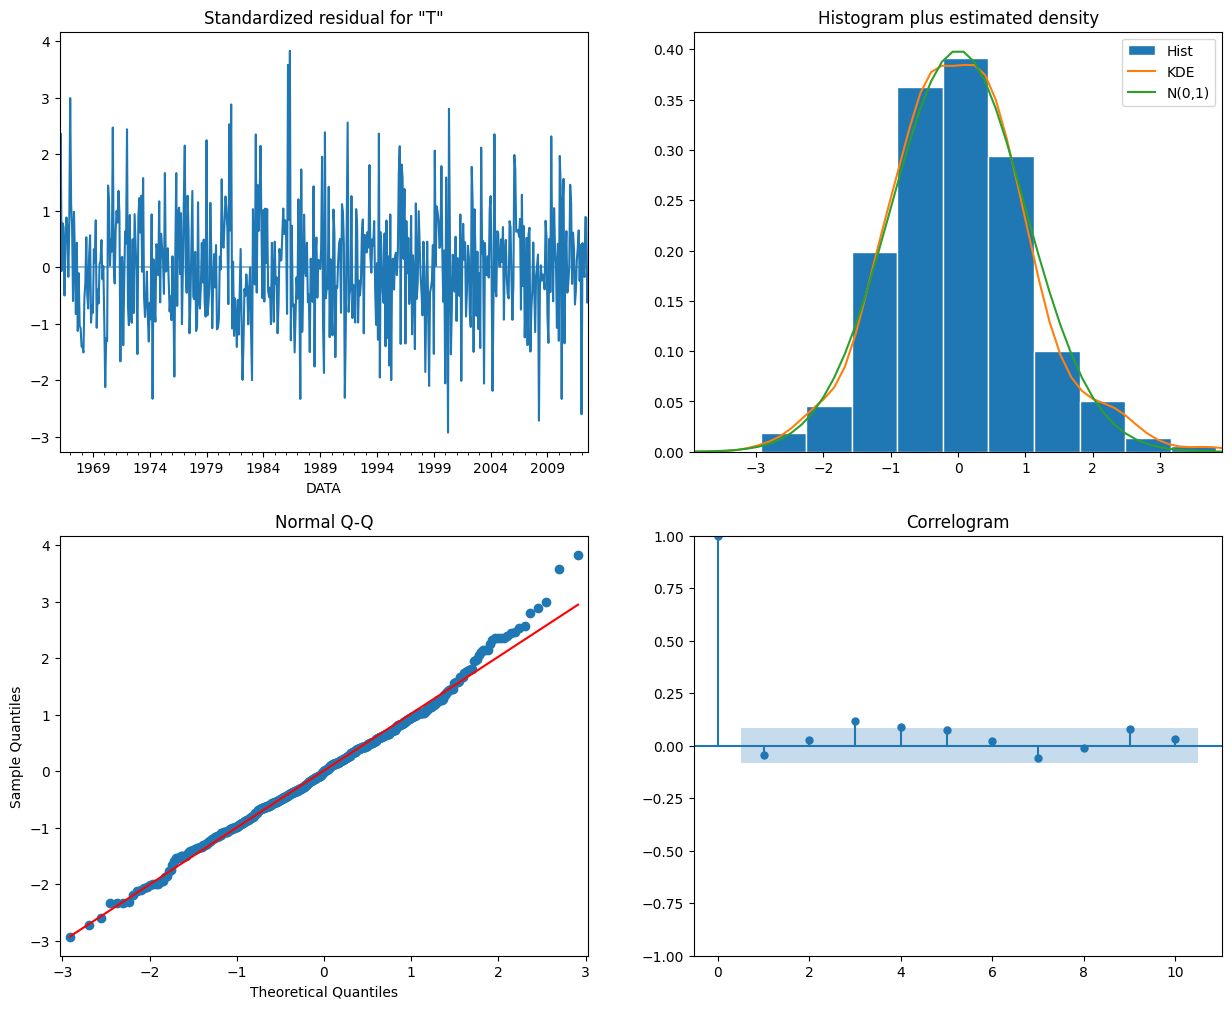

In [30]:
arma_mod.plot_diagnostics(figsize=(15, 12))
plt.show()

### Busca de parâmetros

In [31]:
import itertools


def grid_arima(p_inicial, p_final, q_inicial, q_final, d_valores, treino):
  # Definindo os parâmetros
  p_params = range(p_inicial, p_final)
  q_params = range(q_inicial, q_final)
  d_params = [d_valores]

  # Gerando todas as combinações possíveis usando product
  combinacoes = list(itertools.product(p_params, d_params, q_params))

  aic_grid = dict()
  # Treinando o modelo e salvando todas combinações
  for order in combinacoes:
    try:
      model = ARIMA(treino, order = order).fit()
      aic_grid[order] = list()
      aic_grid[order].append((model.aic if model.aic else float('inf')))
    except:
      continue
  return aic_grid, min(aic_grid, key=lambda x: aic_grid[x][0])


# O código acima está configurado para testar combinações de parâmetros
# onde 'p' varia de 10 a 25, e 'q' de 1 a 5, enquanto 'd' é fixo em 0.
# O código utiliza o intervalo de 10 a 25 para o parâmetro p e de 1 a 5 para o parâmetro q,
# mantendo o parâmetro d constante em 0, como indicado pela configuração [0] para d_valores.
# Isso reflete a gama de combinações que o código está configurado para testar.

In [32]:
import warnings
warnings.filterwarnings('ignore') # ignorando observações
aic_arma = grid_arima(10,25,1,3,0,treino)

In [33]:
# O uso de [0] para o parâmetro d_params indica que estamos interessados em manter o modelo sem diferenciação,
# efetivamente transformando o modelo ARIMA em um modelo ARMA.

# Ao configurar o parâmetro d (ordem de diferenciação) como 0, o modelo ARIMA se transforma em um modelo ARMA.
# O parâmetro d=0 significa que não há diferenciação aplicada aos dados,
# fazendo com que o modelo trate apenas a autorregressão e a média móvel, características essenciais de um modelo ARMA.
# aic_arma[0]

In [34]:
arma_mod_ot = ARIMA(treino, order = aic_arma[1]).fit()
print(arma_mod_ot.summary())

                               SARIMAX Results                                
Dep. Variable:                   TEMP   No. Observations:                  559
Model:                ARIMA(24, 0, 2)   Log Likelihood                -934.109
Date:                Mon, 20 Jan 2025   AIC                           1924.218
Time:                        12:20:59   BIC                           2045.350
Sample:                    02-01-1966   HQIC                          1971.521
                         - 08-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9729      0.004   4632.762      0.000      19.964      19.981
ar.L1         -0.4116      0.318     -1.296      0.195      -1.034       0.211
ar.L2          0.1878      0.130      1.445      0.1

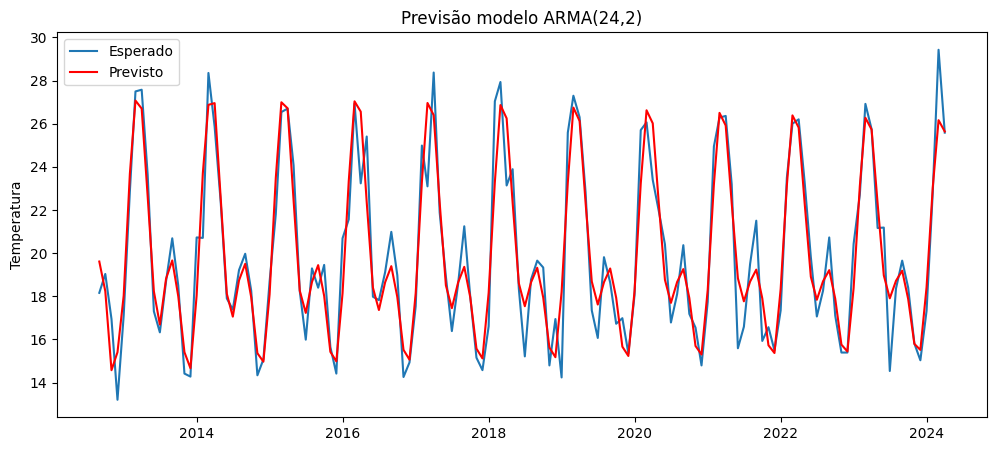


Métricas:

MAE: 1.065407126818566
MSE: 1.9801083478441062


In [35]:
plot_prev(treino, teste, arma_mod_ot, 'ARMA(24,2)')

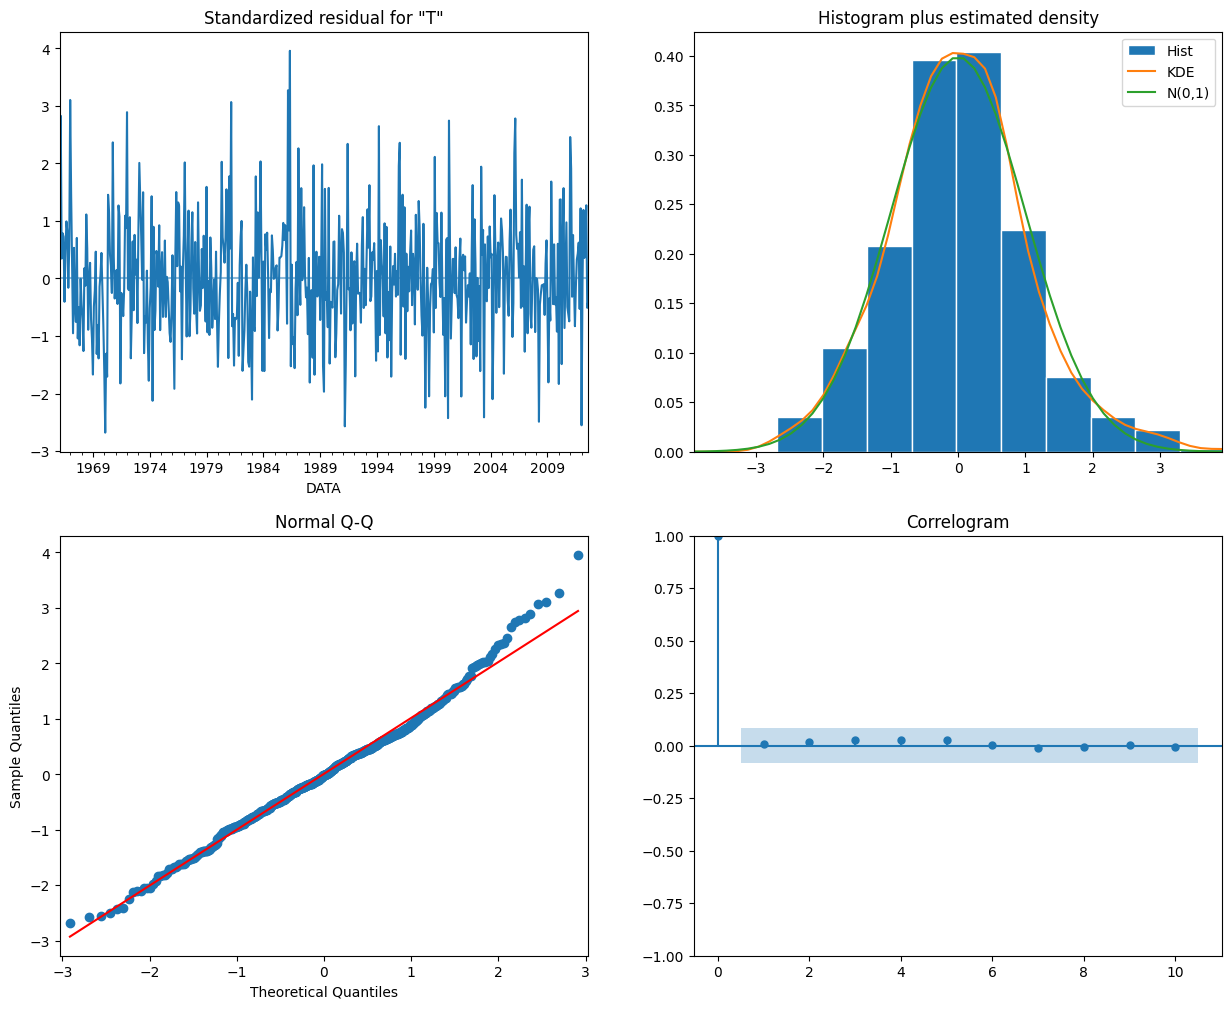

In [57]:
arma_mod_ot.plot_diagnostics(figsize=(15,12))
plt.show()

# Fazenda 3

![Alt text: Imagem de uma fazenda com plantações de arroz](https://github.com/Mirlaa/s-ries-temporais-statsmodels/blob/main/imagens/Fazenda%203.png?raw=true)

In [37]:
df_f3 = pd.read_csv(dados_f3)
df_f3

,DATA,TEMP
0,1965-09-01,33.30
1,1965-10-01,32.88
2,1965-11-01,30.28
3,1965-12-01,30.42
4,1966-01-01,30.39
...,...,...
699,2023-12-01,31.72
700,2024-01-01,32.22
701,2024-02-01,32.29
702,2024-03-01,29.60


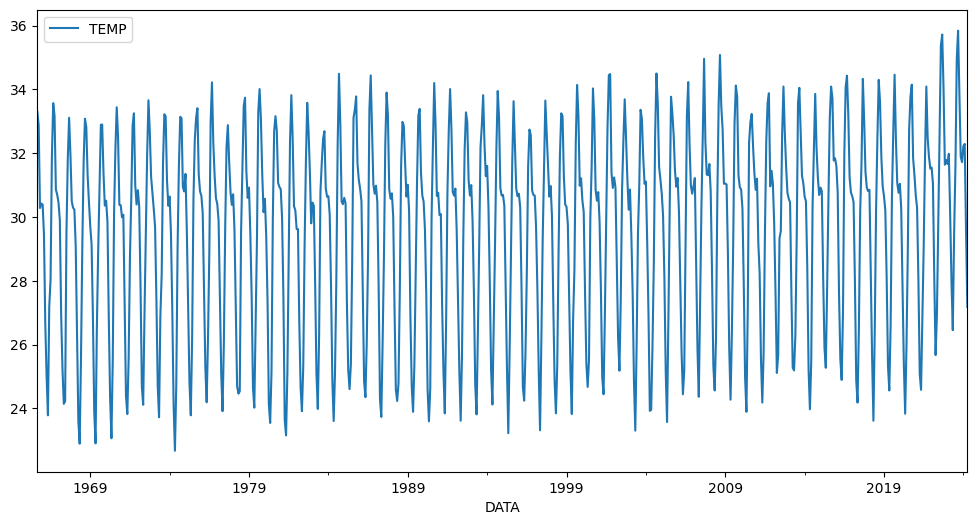

In [38]:
df_f3['DATA'] = pd.to_datetime(df_f3['DATA'], format='%Y-%m-%d')
df_f3.set_index(['DATA'], inplace=True, drop=True)
fig = df_f3.plot(figsize=(12, 6))

In [39]:
estac(df_f3)

Valor-p do Teste ADF: 0.0669
Não rejeitar a Hipótese Nula: a série não é estacionária

Valor-p do Teste KPSS: 0.0100
Rejeitar a Hipótese Nula: a série não é estacionária



In [40]:
df_f3.diff(1)

,TEMP
DATA,
1965-09-01,NaN
1965-10-01,-0.42
1965-11-01,-2.60
1965-12-01,0.14
1966-01-01,-0.03
...,...
2023-12-01,-0.16
2024-01-01,0.50
2024-02-01,0.07


In [41]:
estac(df_f3.diff(1).iloc[1:])

Valor-p do Teste ADF: 0.0000
Rejeitar a Hipótese Nula: a série é estacionária

Valor-p do Teste KPSS: 0.1000
Não rejeitar a Hipótese Nula: a série é estacionária



## Modelo Integrado Autorregressivo de Média Móveis (ARIMA)

In [42]:
divisao = int(len(df_f3) * 0.8)

treino = df_f3.iloc[:divisao].asfreq('MS')
teste = df_f3.iloc[divisao:].asfreq('MS')

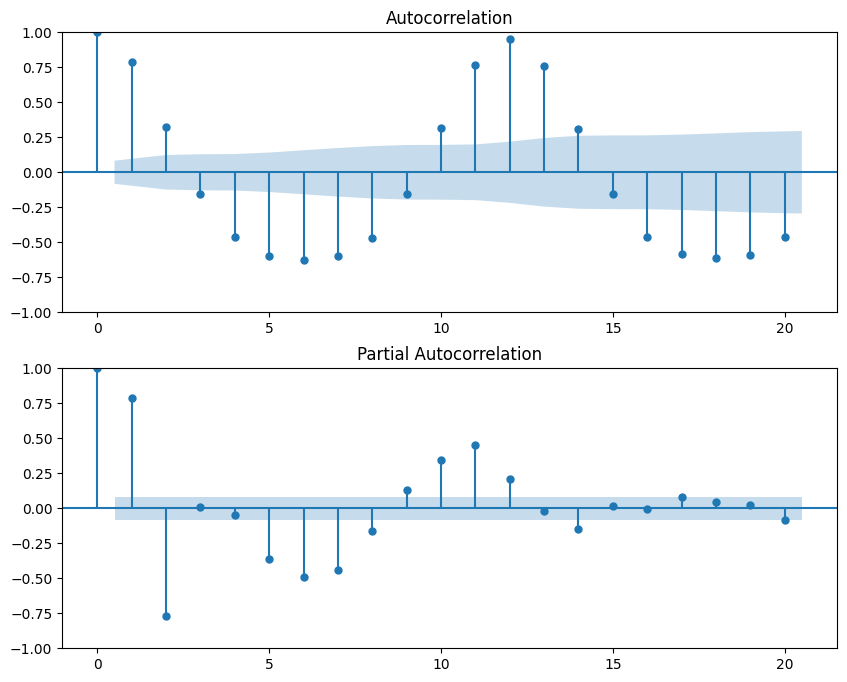

In [43]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(treino, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(treino, lags=20, ax=ax2)

O modelo ARIMA combina três componentes principais: autorregressivo (AR), diferenciado (I de Integrated, ou integrado) e de média móvel (MA), o que o torna capaz de modelar uma ampla variedade de dados temporais.

O modelo ARIMA é geralmente representado como ARIMA(p, d, q), onde:

- $(p)$ é o número de termos autoregressivos,
- $( d )$ é o número de diferenciações necessárias para tornar a série temporal estacionária,
- $( q )$ é o número de termos de média móvel.

A equação genérica do modelo ARIMA é:

$(1 - \sum_{i=1}^p \beta_i L^i)(1 - L)^d X_t = (1 + \sum_{j=1}^q \theta_j L^j) \epsilon_t$

In [44]:
arima_mod =ARIMA(treino, order=(14,1,2)).fit()
print(arima_mod.summary())

                               SARIMAX Results                                
Dep. Variable:                   TEMP   No. Observations:                  563
Model:                ARIMA(14, 1, 2)   Log Likelihood                -544.665
Date:                Mon, 20 Jan 2025   AIC                           1123.329
Time:                        12:21:08   BIC                           1196.965
Sample:                    09-01-1965   HQIC                          1152.078
                         - 07-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4231      0.430     -0.985      0.325      -1.265       0.419
ar.L2          0.1336      0.488      0.274      0.784      -0.823       1.090
ar.L3         -0.2672      0.397     -0.674      0.5

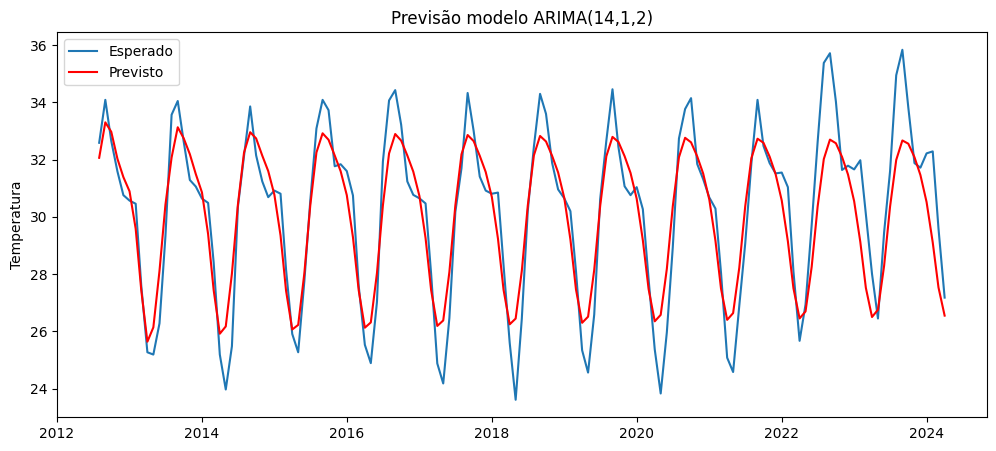


Métricas:

MAE: 1.0086267979962678
MSE: 1.6127422886316622


In [58]:
plot_prev(treino, teste, arima_mod, 'ARIMA(14,1,2)')

### Busca de parâmetros

In [46]:
aic_arima = grid_arima(14,25,1,3,1,treino)

In [47]:
aic_arima[1]

(24, 1, 2)

In [48]:
arima_mod_ot = ARIMA(treino, order = (24, 1, 2)).fit()
print(arima_mod_ot.summary())

                               SARIMAX Results                                
Dep. Variable:                   TEMP   No. Observations:                  563
Model:                ARIMA(24, 1, 2)   Log Likelihood                -504.938
Date:                Mon, 20 Jan 2025   AIC                           1063.876
Time:                        12:24:23   BIC                           1180.827
Sample:                    09-01-1965   HQIC                          1109.535
                         - 07-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4442      0.152     -2.928      0.003      -0.742      -0.147
ar.L2          0.1559      0.086      1.811      0.070      -0.013       0.325
ar.L3         -0.1382      0.072     -1.931      0.0

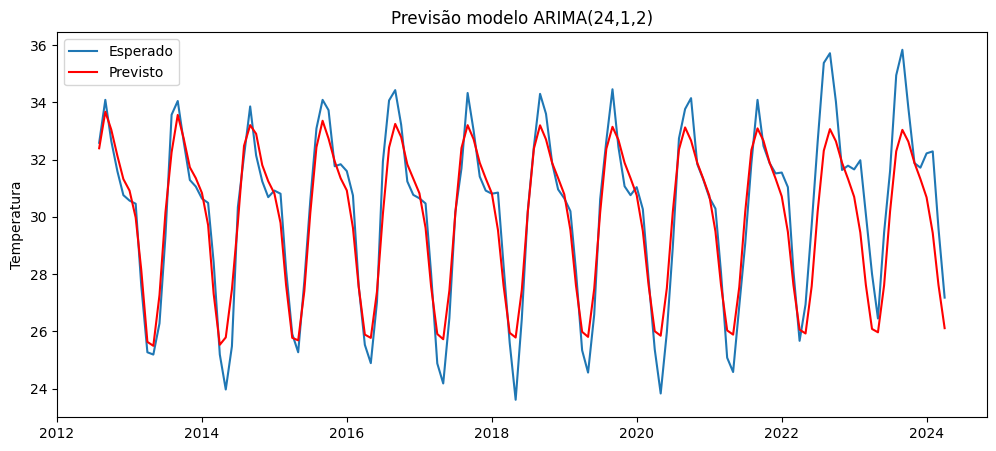


Métricas:

MAE: 0.8308415470649783
MSE: 1.1579346525653609


In [49]:
plot_prev(treino, teste, arima_mod_ot, 'ARIMA(24,1,2)')

### **A sazonalidade**

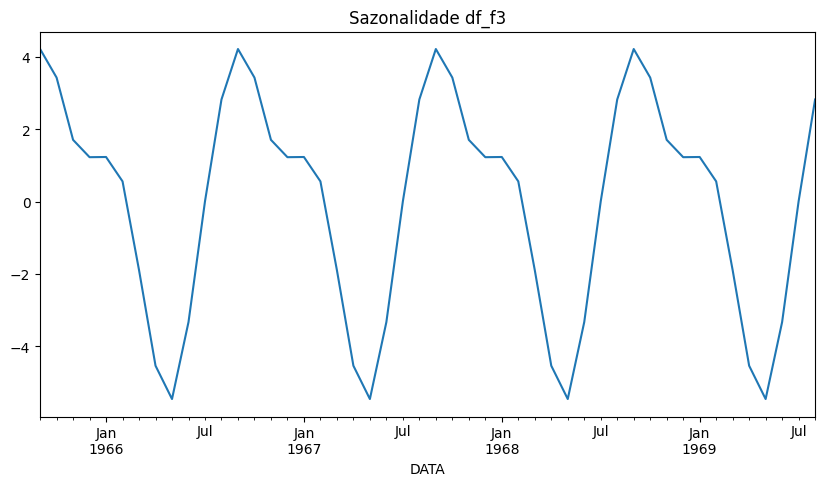

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao_df = seasonal_decompose(df_f3)
fig = plt.figure(figsize=(10,5))
decomposicao_df.seasonal.iloc[:48].plot(title = 'Sazonalidade df_f3')
plt.show()

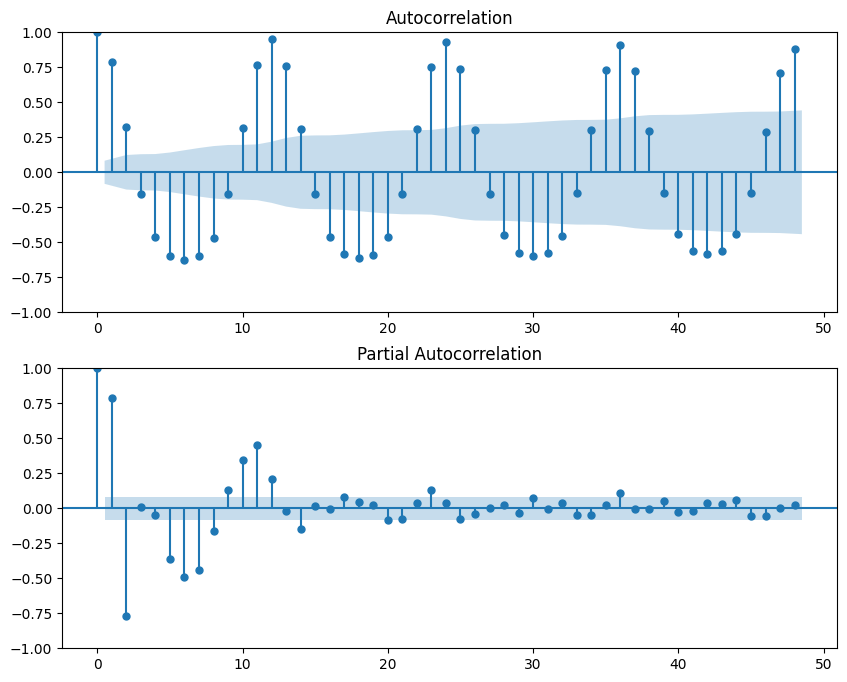

In [51]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(treino, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(treino, lags=48, ax=ax2)

## Modelo Autorregressivo Sazonal de Média Móveis Integrado (SARIMA)

O modelo SARIMA é uma extensão do modelo ARIMA, projetado especificamente para modelar e prever séries temporais que exibem sazonalidade.

O modelo SARIMA pode ser descrito pela seguinte equação, que combina tanto os efeitos sazonais quanto os não sazonais:

$(1 - \sum_{i=1}^p \beta_i L^i)(1 - \sum_{i=1}^P B_i L^{is})(1 - L)^d(1 - L^s)^D X_t = (1 + \sum_{j=1}^q \theta_j L^j)(1 + \sum_{j=1}^Q \Theta_j L^{js}) \epsilon_t$

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 11 porque é um periodo inferior a 12 que é o periodo sazonal.
sarima_mod = SARIMAX(treino, order = (11,1,2), seasonal_order = (2,1,1,12)).fit()
print(sarima_mod.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                  TEMP   No. Observations:                  563
Model:             SARIMAX(11, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -456.394
Date:                               Mon, 20 Jan 2025   AIC                            946.787
Time:                                       12:25:07   BIC                           1020.056
Sample:                                   09-01-1965   HQIC                           975.419
                                        - 07-01-2012                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5654      0.147     -3.834      0.000      -0.854      -0.276
ar.L2      

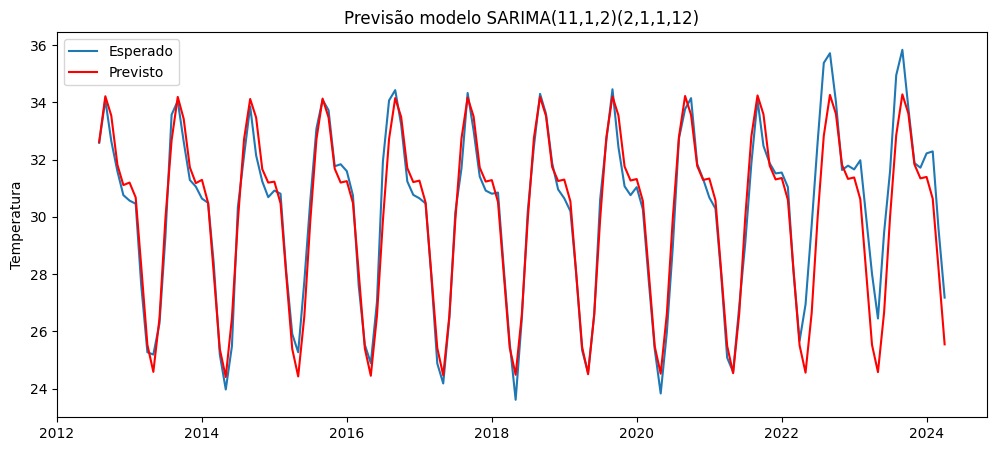


Métricas:

MAE: 0.5943407175501881
MSE: 0.7494966307103164


In [53]:
plot_prev(treino, teste, sarima_mod,'SARIMA(11,1,2)(2,1,1,12)')

# Previsões das Fazendas

Temos 3 modelos para 3 conjuntos de dados sobre as temperaturas das fazendas

* Fazenda 1 modelo $AR(34)$
* Fazenda 2 modelo $ARMA(24,2)$
* Fazenda 3 modelo $SARIMA(11, 1, 1)\times (2, 1, 1, 12)$

```Python
mod_f1 = AutoReg(df_f1, 34, old_names=False).fit()
mod_f2 = ARIMA(df_f2, order=(24,0,2)).fit()
mod_f3 = SARIMAX(df_f3, order=(11, 1, 1), seasonal_order=(2, 1, 1, 12)).fit()
```

In [72]:
mod_f1 = AutoReg(df_f1, 34, old_names=False).fit()
mod_f2 = ARIMA(df_f2, order=(24,0,2)).fit()
mod_f3 = SARIMAX(df_f3, order=(11, 1, 1), seasonal_order=(2, 1, 1, 12)).fit()


In [55]:
previsao_f1 = mod_f1.predict(len(df_f1), len(df_f1)+35, dynamic= False)
previsao_f2 = mod_f2.predict(len(df_f2), len(df_f2)+35, dynamic= False)
previsao_f3 = mod_f3.predict(len(df_f3), len(df_f3)+35, dynamic= False)

In [73]:
df_f1

,TEMP
DATA,
1963-05-01,23.11
1963-06-01,24.20
1963-07-01,25.37
1963-08-01,23.86
1963-09-01,23.03
...,...
2023-12-01,19.49
2024-01-01,19.28
2024-02-01,19.73


In [71]:
previsao_f1

,0
2024-05-01,23.754813
2024-06-01,25.073979
2024-07-01,25.745189
2024-08-01,25.482945
2024-09-01,24.688088
2024-10-01,23.396004
2024-11-01,21.987786
2024-12-01,20.884098
2025-01-01,20.462515
2025-02-01,20.671650
